    _id Forward_Sortation_Area Name_of_Dog                          Breed  \
0     1                    M6R       CHLOE                     BEAGLE MIX   
1     2                    M3M         OSO                          AKITA   
2     3                    M4N      HOBBES     CANE CORSO / LABRADOR RETR   
3     4                    M9W      HUNTER                    GOLDEN RETR   
4     5                    M1E        LILA  GERM SHEPHERD / AUST SHEPHERD   
..  ...                    ...         ...                            ...   
95   96                    M4J        LULU                   AMER BULLDOG   
96   97                    M6N      HABIBA                 DOGO ARGENTINO   
97   98                    M6N       ZATAR                 DOGO ARGENTINO   
98   99                    M3A      PEPPER                          BOXER   
99  100                    M6A     GREYDEE                    COCKER SPAN   

                 Color Ward_Number               Ward_Name Bite_Circumstanc

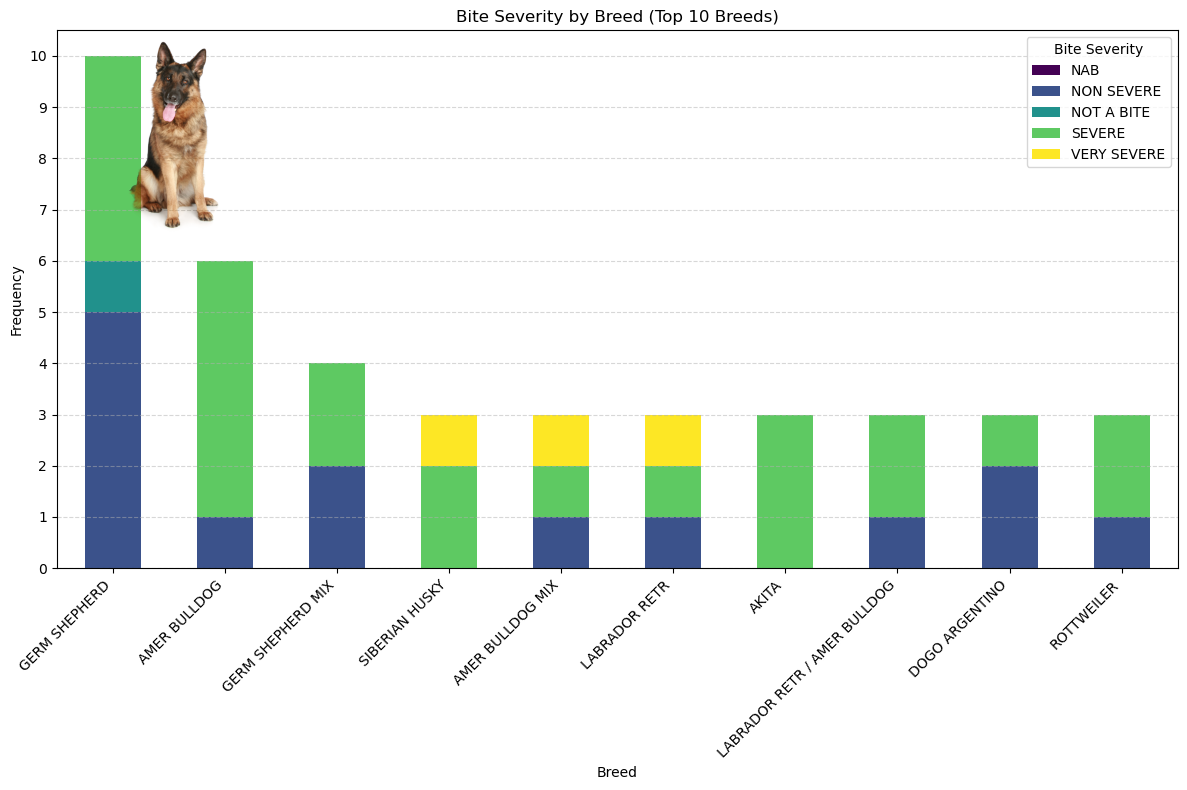

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import PIL as pil
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from PIL import Image
from io import BytesIO
import seaborn as sns
# Toronto Open Data is stored in a CKAN instance. It's APIs are documented here:
# https://docs.ckan.org/en/latest/api/

# Base URL for the API
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# API endpoint to retrieve package metadata
url = base_url + "/api/3/action/package_show"
params = {"id": "dogs-issued-dangerous-dog-orders"}
package = requests.get(url, params=params).json()

# Initialize an empty list to store data
data_list = []

# Loop through resources in the package
for idx, resource in enumerate(package["result"]["resources"]):
    # For datastore_active resources
    if resource["datastore_active"]:
        # API endpoint to retrieve data
        url = base_url + "/api/3/action/datastore_search"
        p = {"id": resource["id"]}
        resource_search_data = requests.get(url, params=p).json()["result"]["records"] #The records key contains the data
        # Append records to the data list
        data_list.extend(resource_search_data)

# Convert the data list to a Pandas DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
print(df)



# Group the data by 'Breed' and 'Bite_Circumstance' and count occurrences
group_data = df.groupby(['Breed', 'Bite_Circumstance']).size().unstack(fill_value=0)

# Subset the top 10 breeds
top_10_breeds = df['Breed'].value_counts().head(10).index
group_data = group_data.reindex(top_10_breeds, fill_value=0)  # Reindex to avoid KeyError

# Plot the stacked bar chart
fig = plt.figure(figsize=(12, 8))  # Create a Figure object
ax = fig.add_subplot(111)  # Add a subplot to the Figure

group_data.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Add labels and title
ax.set_title('Bite Severity by Breed (Top 10 Breeds)')
ax.set_xlabel('Breed')
ax.set_ylabel('Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
ax.legend(title='Bite Severity')
ax.yaxis.set_major_locator(MultipleLocator(1)) #Set y-axis frequency to 1 
ax.grid(True, axis='y',linestyle='--',alpha=0.5) 
plt.tight_layout()

# Add an image to the plot
ax_image = fig.add_axes([0.08, 0.7, 0.15, 0.25])  # Define position of the image axes
ax_image.axis('off')  # Turn off axes for the image

# Load and display an image
response = requests.get("https://pngimg.com/uploads/german_shepherd/german_shepherd_PNG13.png")
image_file = BytesIO(response.content)
image = Image.open(image_file)
ax_image.imshow(image)
